<a href="https://colab.research.google.com/github/sindhiya813-coder/IndhuK/blob/main/Fraud_Detection_Creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the Dataset**

In [ ]:
import pandas as pd
file_path = "creditcard.csv"
data = pd.read_csv(file_path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Data Exploration**

In [ ]:
print("Dataset Shape: (data.shape)")
print(data.info())
print(data.describe())

Dataset Shape: (data.shape)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-n

**Visualize Class Distribution**

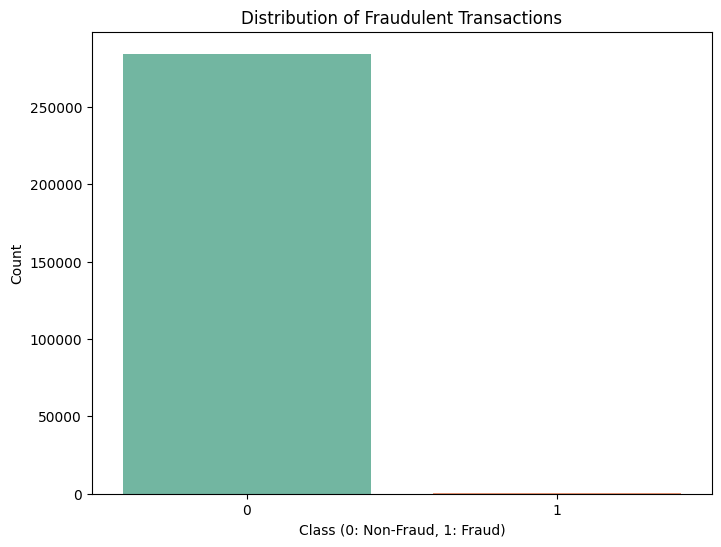

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x="Class", data=data, palette="Set2", hue="Class", legend=False)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel("Count")
plt.show()

**Feature Engineering**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

**Train Machine Learning Models**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.71      0.71        98

    accuracy                           1.00     56962
   macro avg       0.85      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962



**Random Forest Classifier**

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



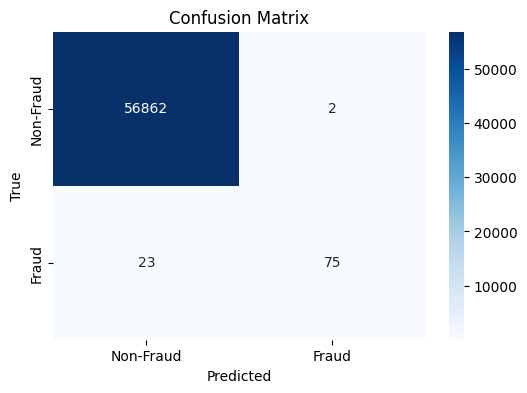

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
df=pd.read_csv('creditcard.csv')
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Neural Network Classifier**

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.33      0.01      0.02        98

    accuracy                           1.00     56962
   macro avg       0.67      0.51      0.51     56962
weighted avg       1.00      1.00      1.00     56962



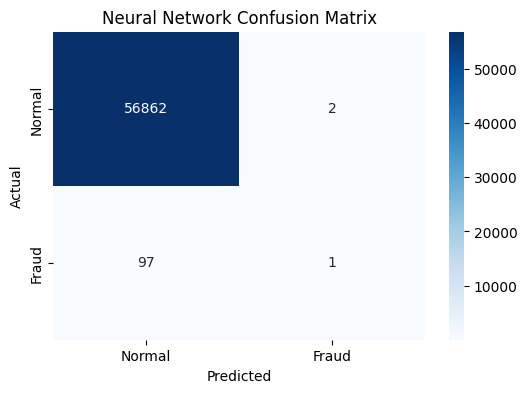

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier # Importing MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined and scaled from previous steps

# Initialize and train the Neural Network model
nn_model = MLPClassifier(max_iter=300, random_state=42) # Added random_state for reproducibility
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Visualize Confusion Matrices**

In [ ]:
import pandas as pd
data =pd.read_csv("creditcard.csv")




In [ ]:
X = data.drop('Class', axis=1) # Drop the target column from features

y = data['Class'] # The target column (fraud or not)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
data = pd.read_csv("creditcard.csv")
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
nn_model = MLPClassifier(max_iter=300, random_state=42)
nn_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test_scaled)



**Feature Importance Plot (for Random Forest)**

/tmp/ipython-input-2663394039.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis') # Corrected arguments


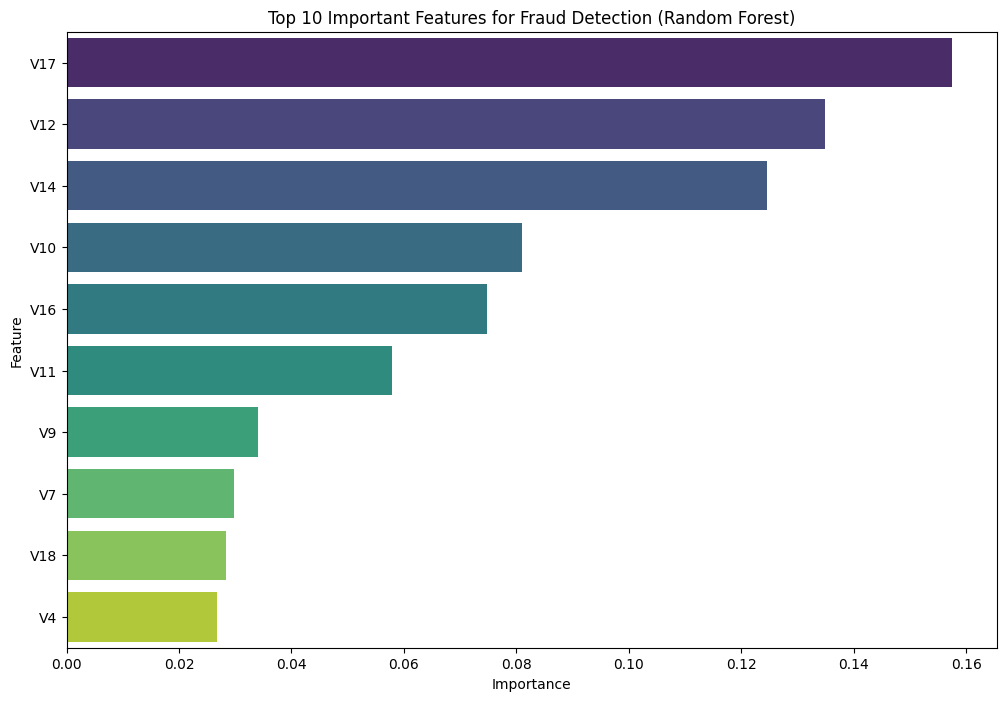

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv("creditcard.csv")
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis') # Corrected arguments
plt.title("Top 10 Important Features for Fraud Detection (Random Forest)") # Added model name
plt.show()

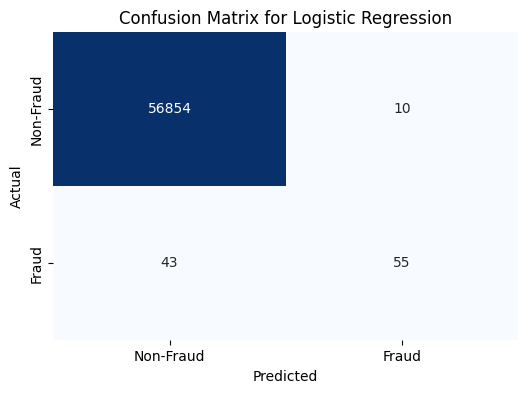

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
data = pd.read_csv("creditcard.csv")
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

**ROC Curve**

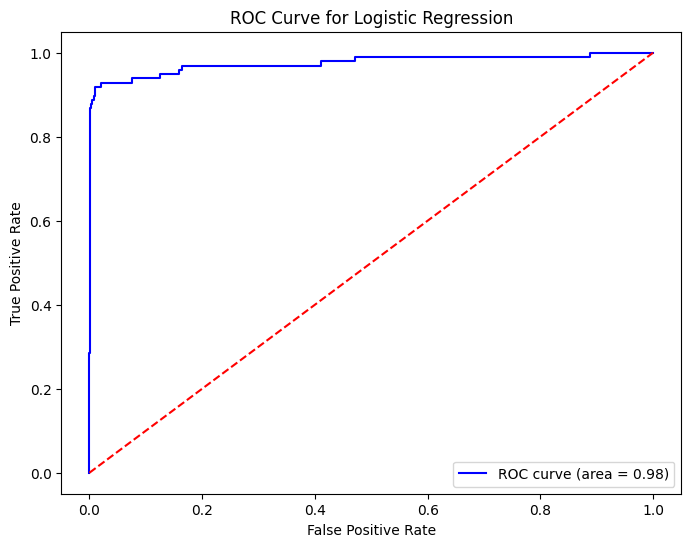

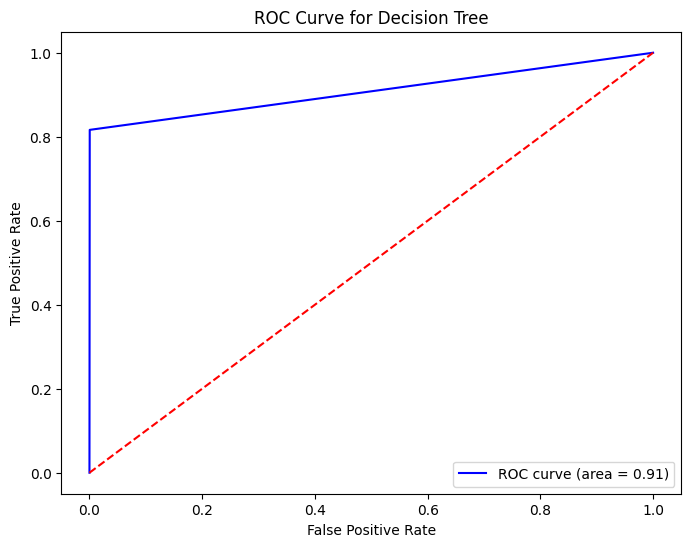

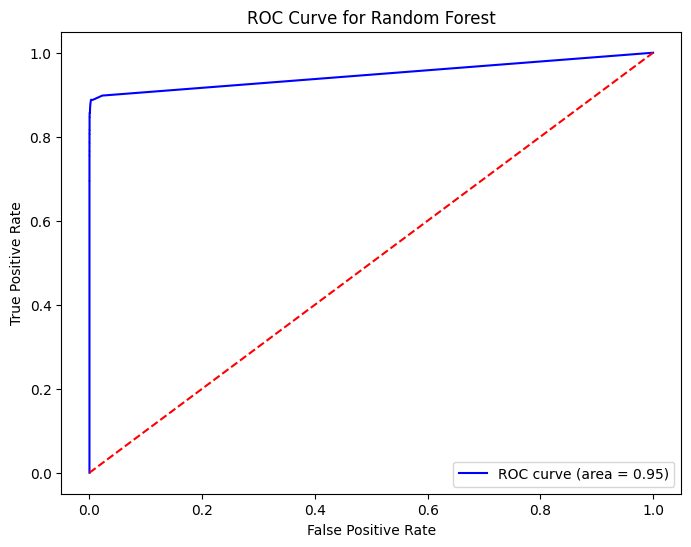

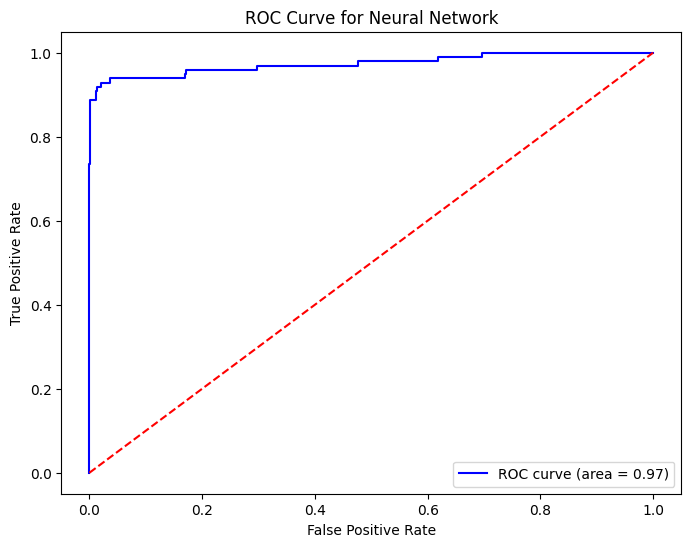

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')

    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
plot_roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:, 1], "Logistic Regression")
plot_roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1], "Decision Tree")
plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], "Random Forest")
plot_roc_curve(y_test, nn_model.predict_proba(X_test_scaled)[:, 1], "Neural Network")

**Boxplots to Identify Outliers**

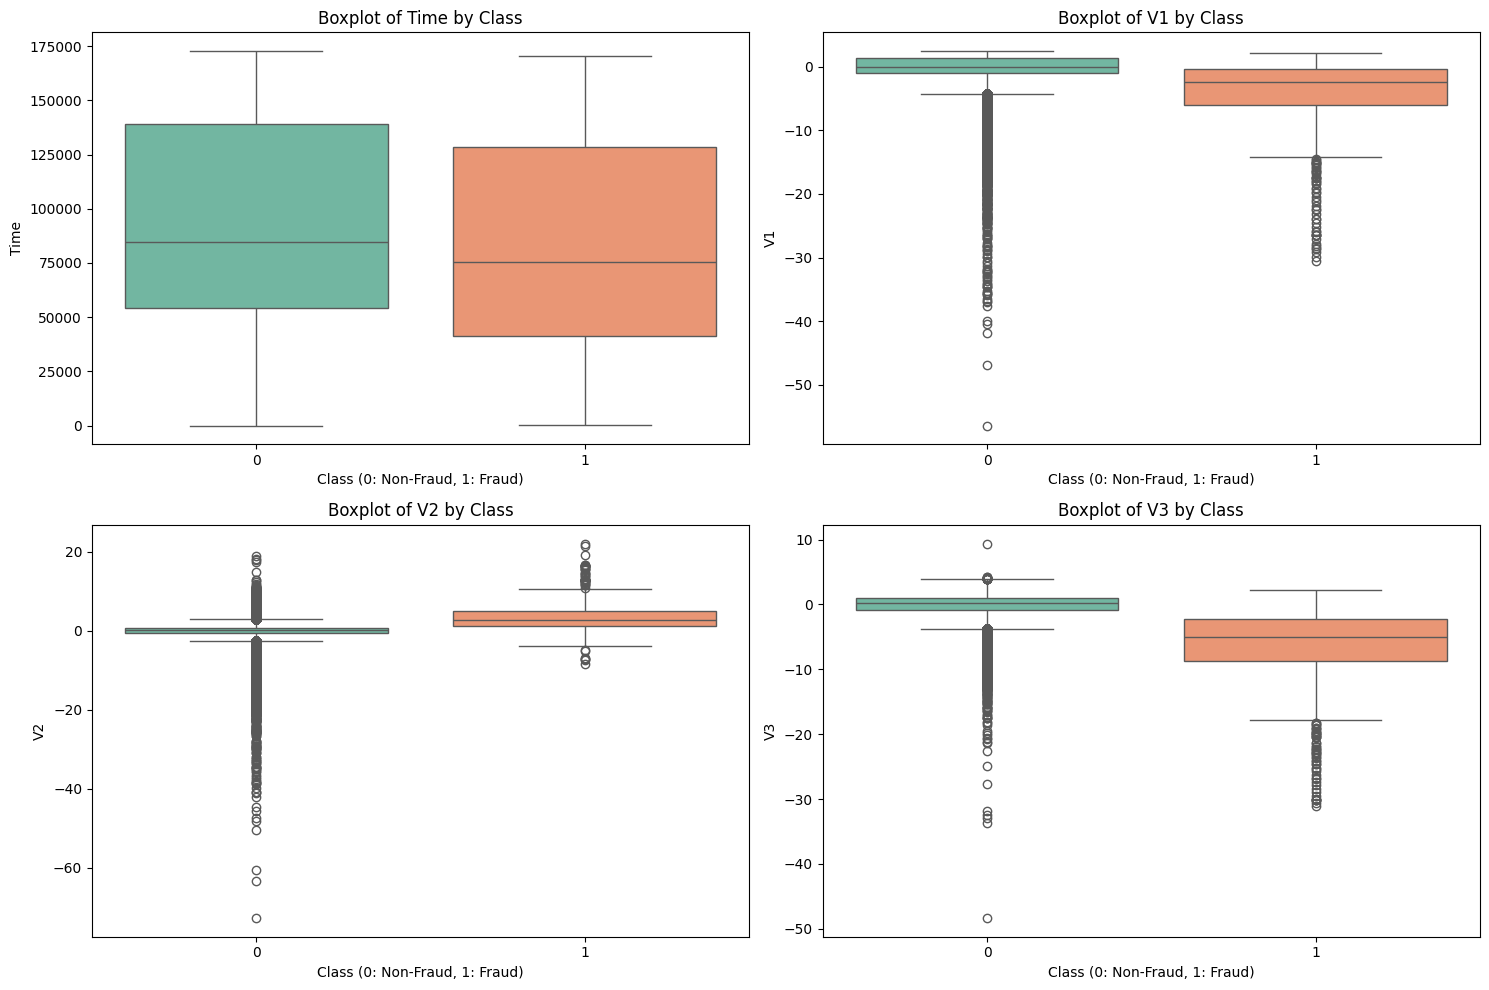

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    feature_name = data.columns[i]
    sns.boxplot(x='Class', y=feature_name, data=data, hue='Class', palette='Set2', legend=False)
    plt.title(f'Boxplot of {feature_name} by Class')
    plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
    plt.ylabel(feature_name)

plt.tight_layout()
plt.show()

**Pair Plots to Visualize Feature Relationships**

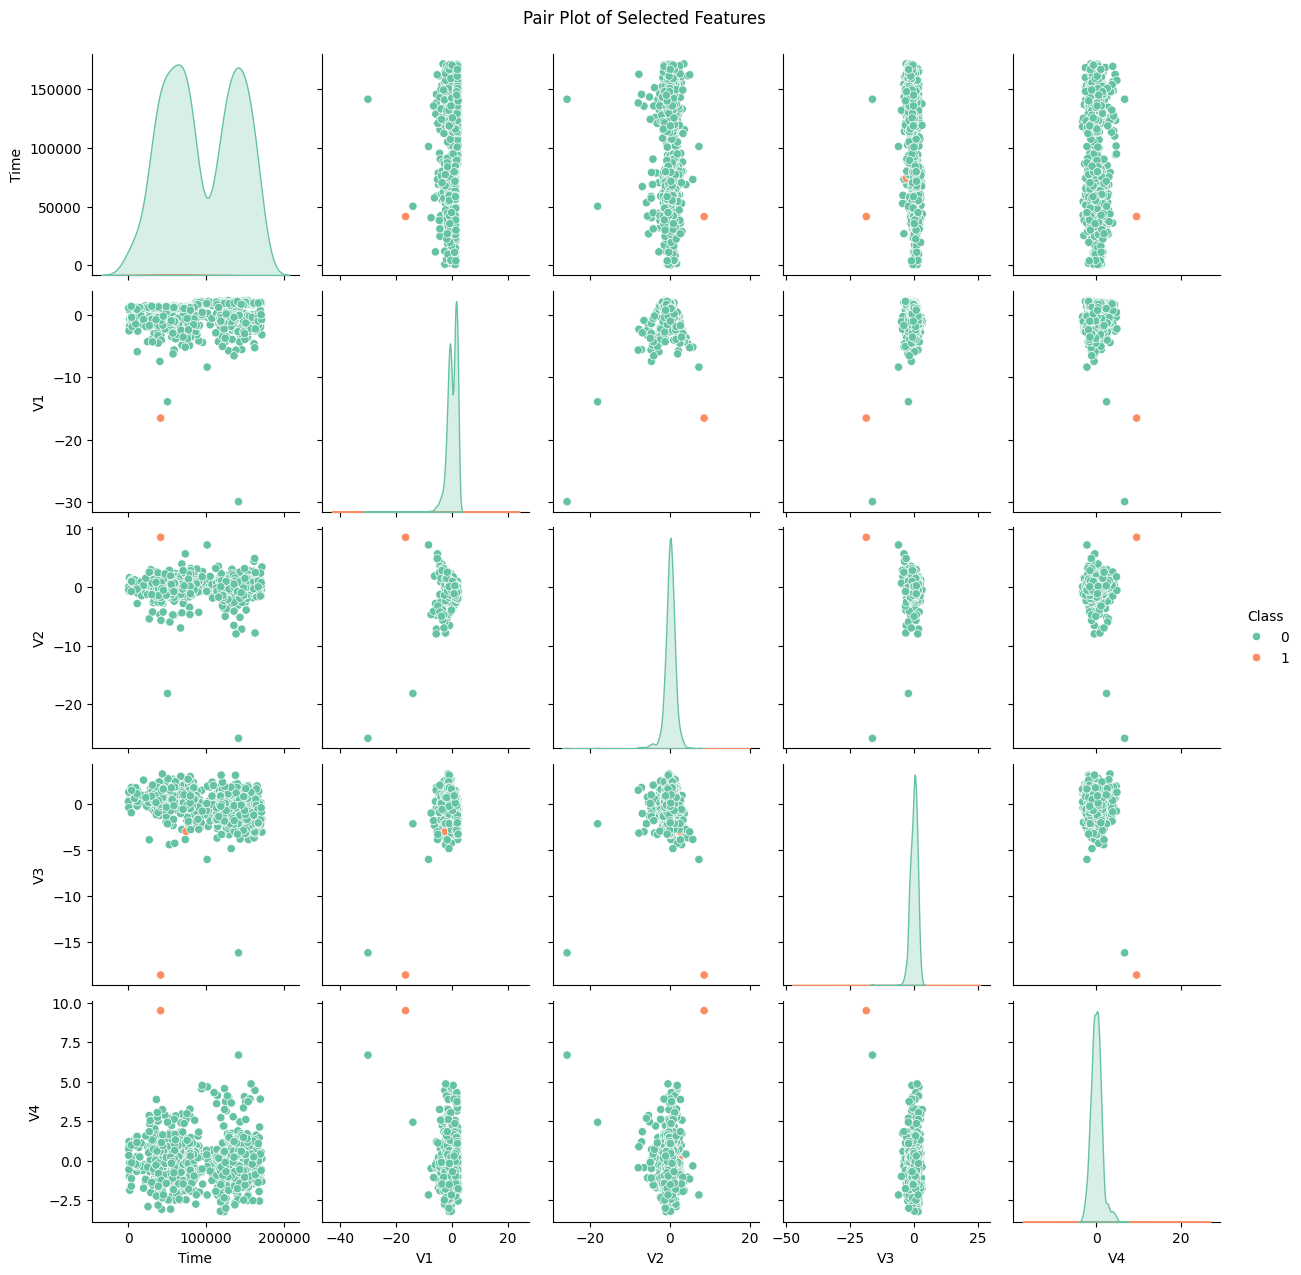

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv("creditcard.csv")
data_sampled = data.sample(1000, random_state=42)
subset_features = data_sampled.columns[:5]
sns.pairplot(data=data_sampled, vars=subset_features, hue='Class', palette='Set2')

plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

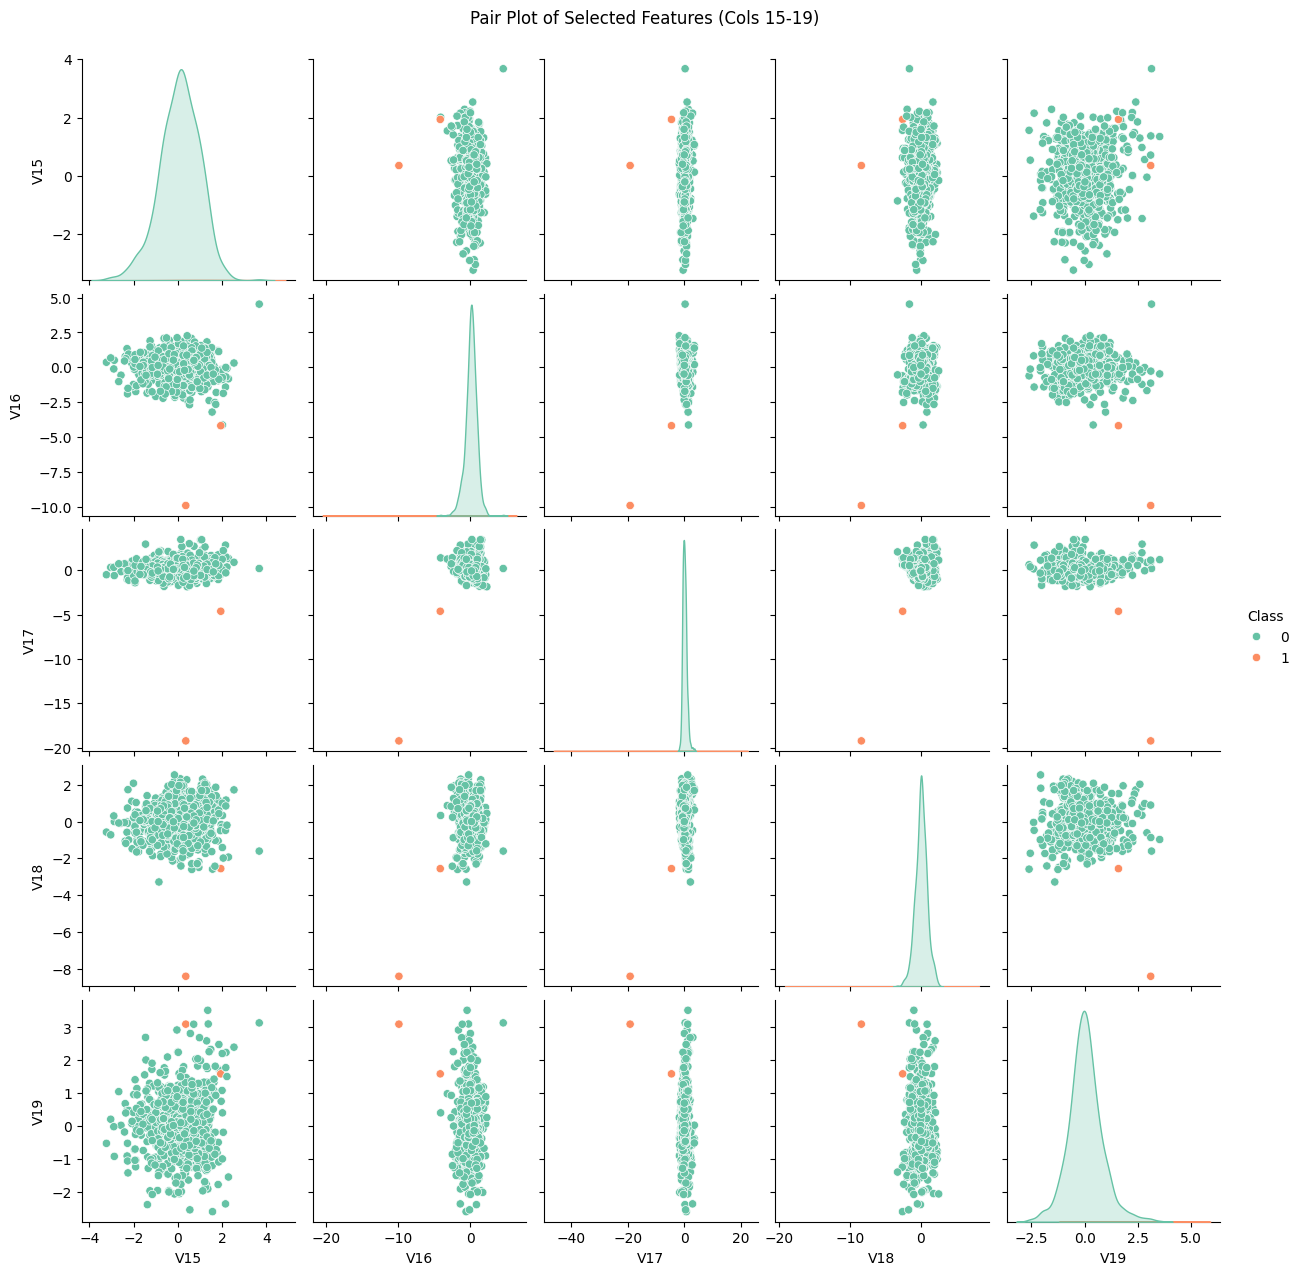

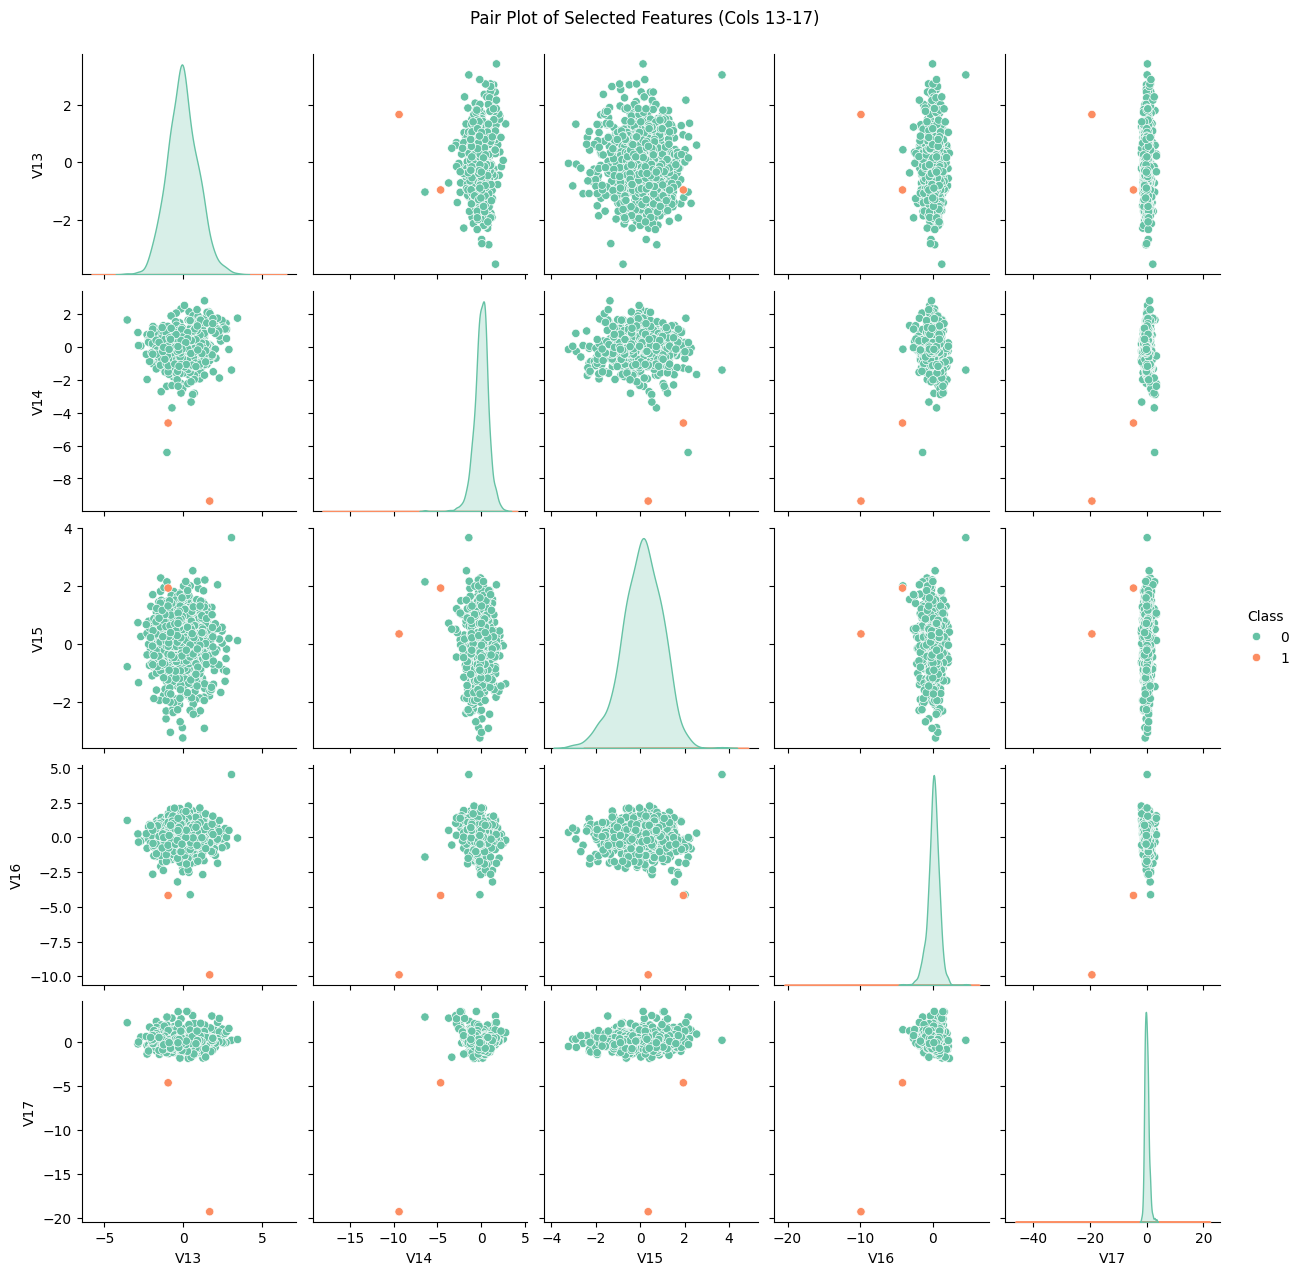

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("creditcard.csv")
data_sampled = data.sample(1000, random_state=42)
subset_features_1 = data_sampled.columns[15:20]
sns.pairplot(data=data_sampled, vars=subset_features_1, hue='Class', palette='Set2')
plt.suptitle('Pair Plot of Selected Features (Cols 15-19)', y=1.02)
plt.show()
subset_features_2 = data_sampled.columns[13:18]
sns.pairplot(data=data_sampled, vars=subset_features_2, hue='Class', palette='Set2')
plt.suptitle('Pair Plot of Selected Features (Cols 13-17)', y=1.02)
plt.show()

**Distribution Plots by Class**

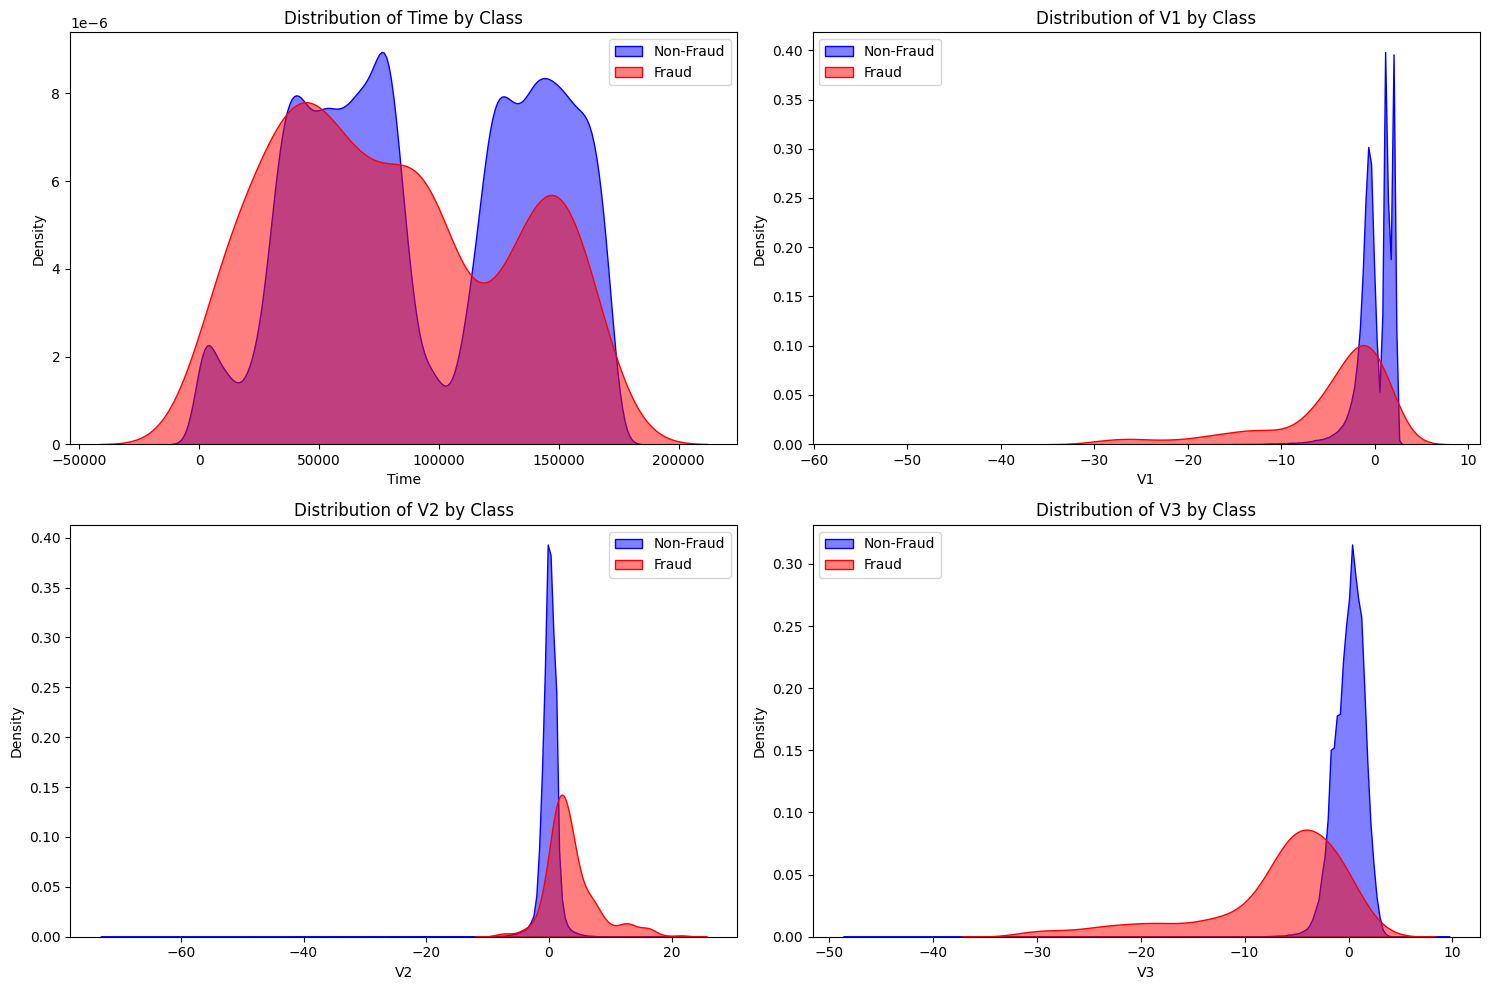

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv("creditcard.csv")
plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    feature_name = data.columns[i]
    sns.kdeplot(data[data['Class'] == 0][feature_name], label='Non-Fraud', fill=True, color='blue', alpha=0.5)
    sns.kdeplot(data[data['Class'] == 1][feature_name], label='Fraud', fill=True, color='red', alpha=0.5)
    plt.title(f'Distribution of {feature_name} by Class')
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

**Violin Plots for Feature Distributions**

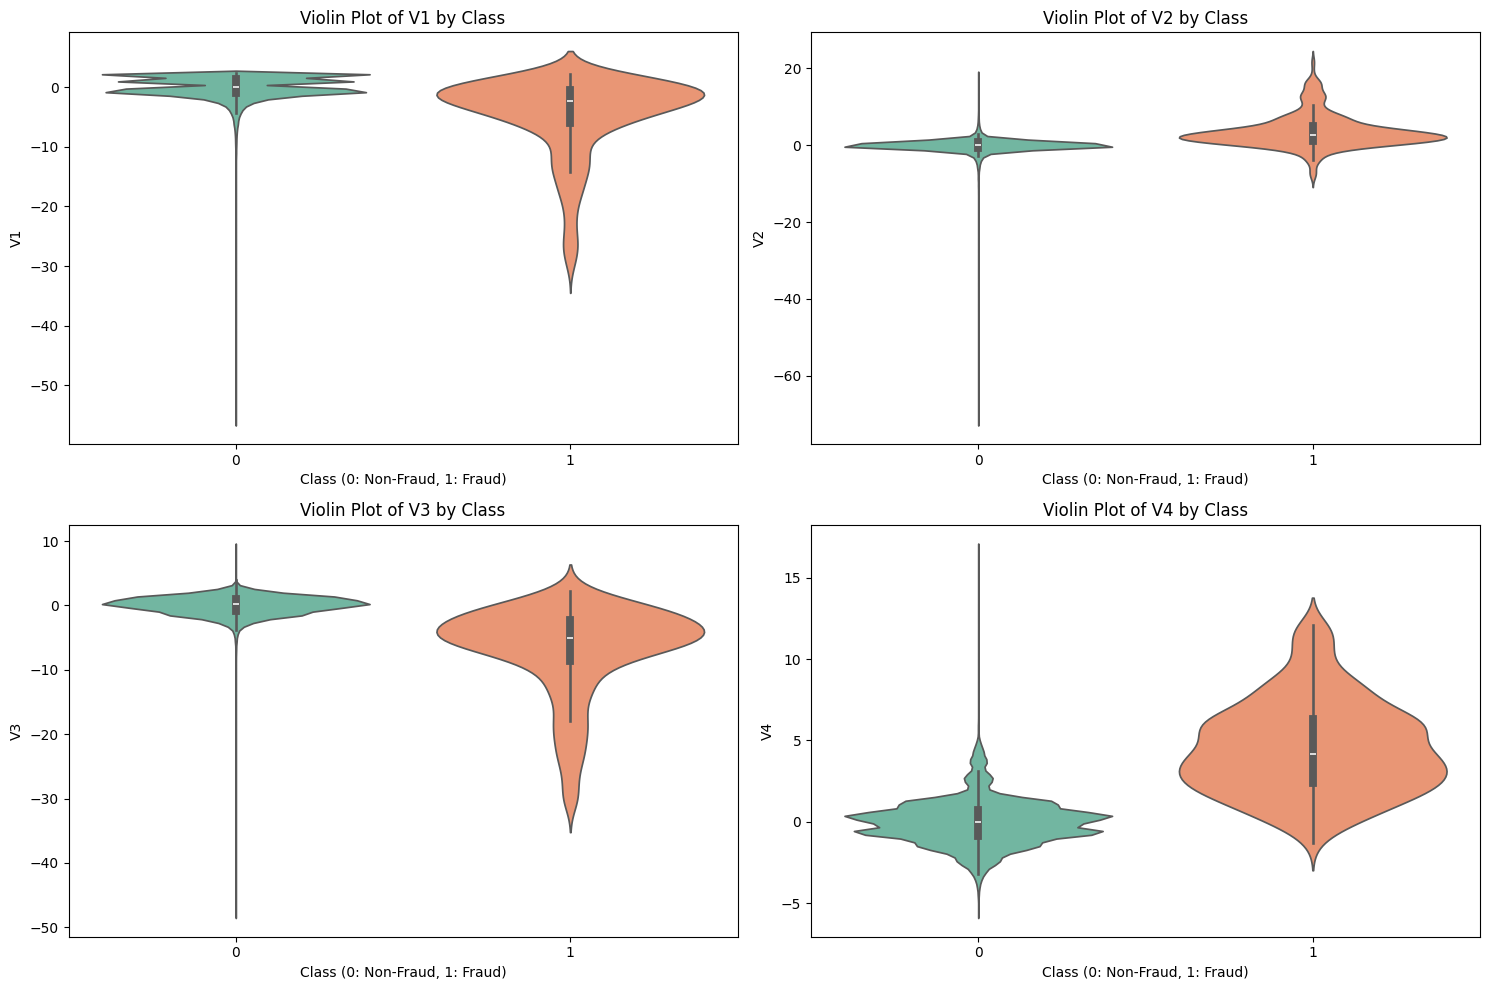

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('creditcard.csv')

plt.figure(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    feature_name = data.columns[i]
    sns.violinplot(x='Class', y=feature_name, data=data, hue='Class', palette='Set2', legend=False)
    plt.title(f'Violin Plot of {feature_name} by Class')
    plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
    plt.ylabel(feature_name)

plt.tight_layout()
plt.show()

**Transaction Amount Distribution**

In [ ]:
import pandas as pd
df =pd.read_csv('creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


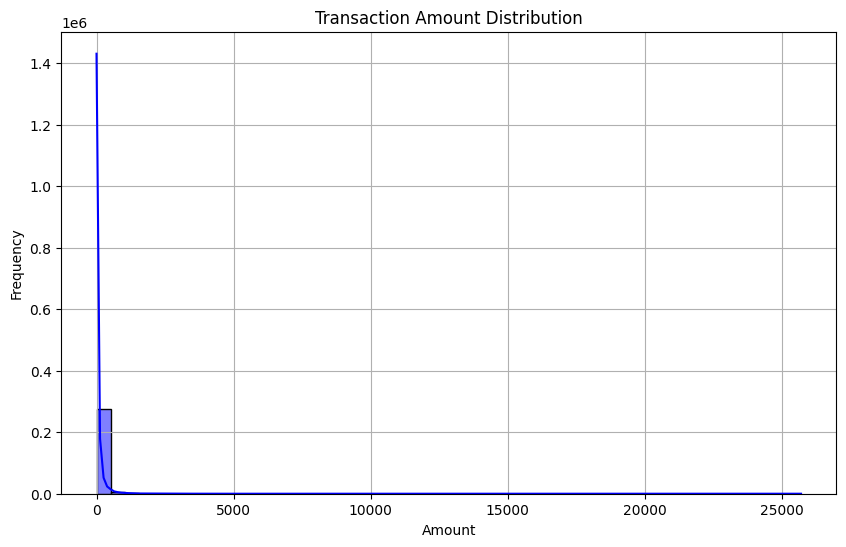

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel('Frequency')
plt.grid()
plt.show()

**Time Series Analysis of Transactions**

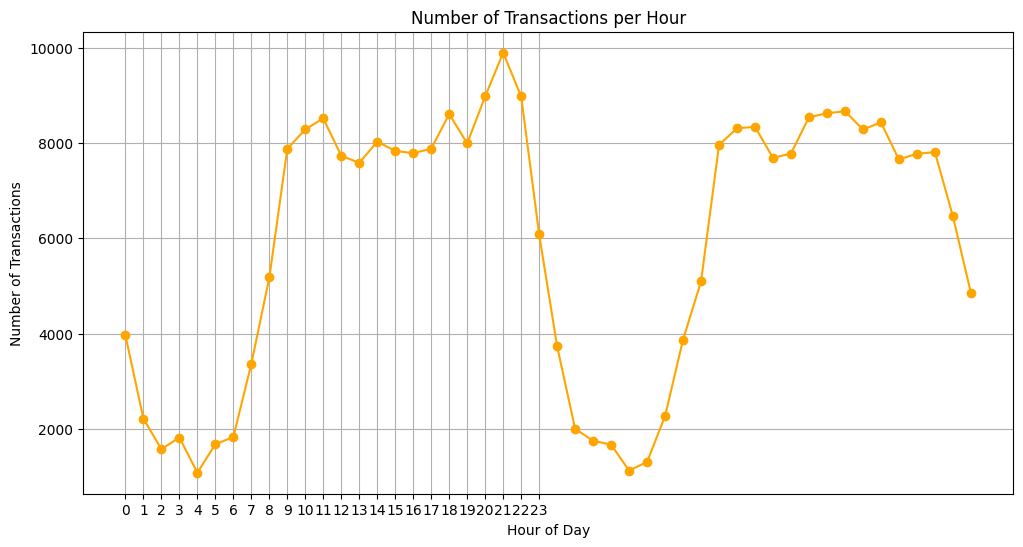

In [ ]:
df['Hour'] = (df['Time'] / 3600).astype(int)
transactions_per_hour = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(transactions_per_hour.index, transactions_per_hour.values, marker='o', color='orange')
plt.title("Number of Transactions per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Feature Correlation Heatmap**

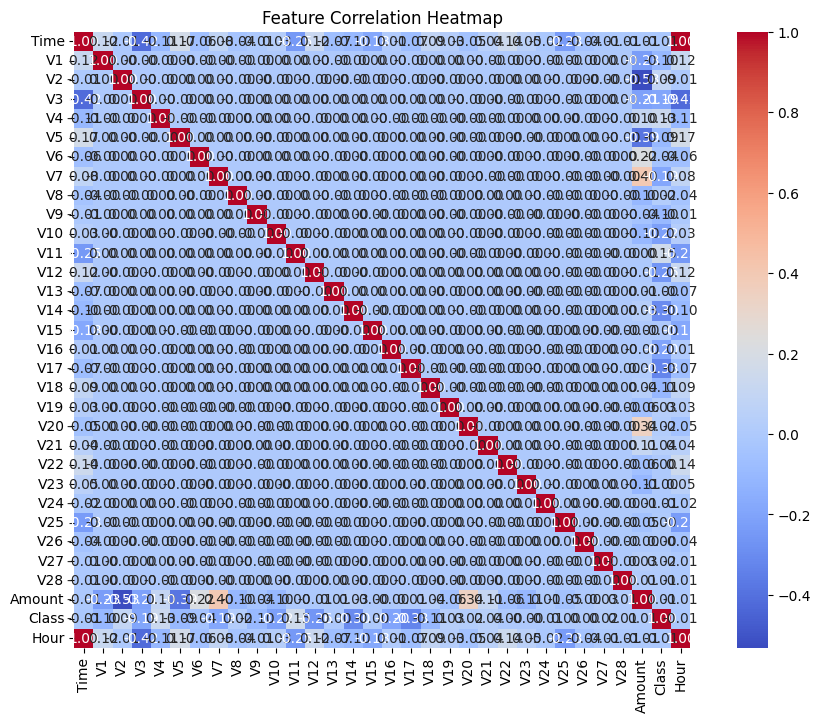

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

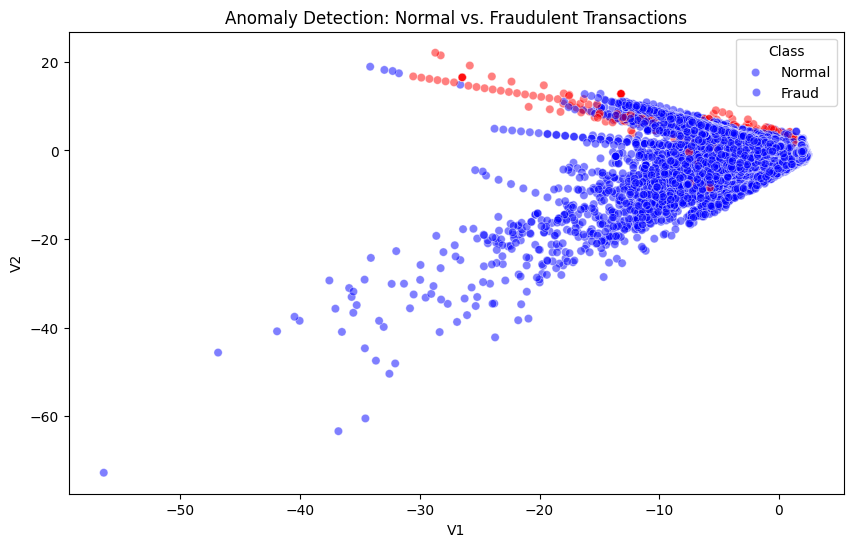

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='V1', y="V2", hue='Class', palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('Anomaly Detection: Normal vs. Fraudulent Transactions')
plt.legend(title='Class', loc='upper right', labels=["Normal", "Fraud"])
plt.xlabel('V1')
plt.ylabel("V2")
plt.show()

**Model Performance Metrics**

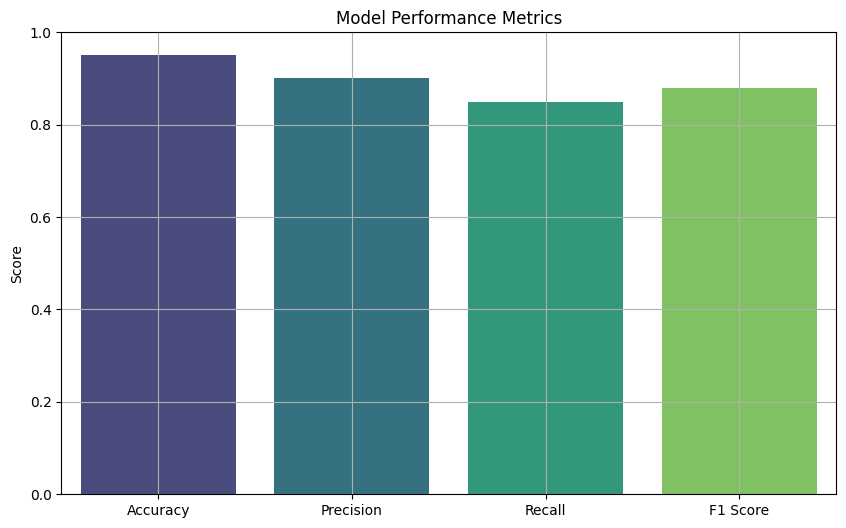

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.95, 0.90, 0.85, 0.88]
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, hue=metrics, palette="viridis")
plt.title('Model Performance Metrics')
plt.ylim(0, 1)
plt.ylabel("Score")
plt.grid()
plt.show()